# HOMEWORK 04 - EVALUATION

The goal of this homework is in inspect the output of different evaluation metrcis by creating a classification model (target column `card`).

## LIBRARIES

In [1]:
import pandas as pd
import numpy as np

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook
%load_ext nb_black
# https://medium.com/@Med1um1/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1

<IPython.core.display.Javascript object>

## DATASET

This homework use Credit Card Data from book "Econometric Analysis"

In [2]:
from pathlib import Path

if not Path("../dataset/AER_credit_card_data.csv").is_file:
    print("File exist")
else:
    print("Downloading dataset...")
    !mkdir dataset
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv
    !mv AER_credit_card_data.csv ./dataset/

mkdir: dataset: File exists
zsh:1: command not found: wget
mv: AER_credit_card_data.csv: No such file or directory


<IPython.core.display.Javascript object>

## Preparation 

- Create the target variable by mapping `yes` to 1 and `no` to 0.
- Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [3]:
df = pd.read_csv("./dataset/AER_credit_card_data.csv")
df["card"] = df["card"].apply(lambda x: 1 if x == "yes" else 0)
display(df.head())
display(df.info())

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 123.8+ KB


None

<IPython.core.display.Javascript object>

In [4]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

<IPython.core.display.Javascript object>

In [5]:
df_train.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1105,0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
431,0,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
407,1,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
1217,1,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
1133,1,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4


<IPython.core.display.Javascript object>

## Question1 

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that 

- For each numerical variable, use it as score and compute AUC with the `card` variable.
- Use the training dataset for that.

if your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negative this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `report`
- `dependents`
- `active`
- `share`

In [6]:
from sklearn.metrics import roc_auc_score

cat_cols = ["owner", "selfemp"]
target_col = "card"
num_cols = [c for c in df.columns if c not in cat_cols and (c != target_col)]

scores = list()
for col in num_cols:
    score = roc_auc_score(df_train[target_col], df_train[col])
    scores.append((col, score))

<IPython.core.display.Javascript object>

In [7]:
scores

[('reports', 0.28333701393106236),
 ('age', 0.4759979020592945),
 ('income', 0.5908049467233478),
 ('share', 0.989183643423692),
 ('expenditure', 0.991042345276873),
 ('dependents', 0.46722427722262094),
 ('months', 0.470578221903237),
 ('majorcards', 0.5343859842838476),
 ('active', 0.6043173411362006)]

<IPython.core.display.Javascript object>

In [19]:
neg_corr = ["reports", "age", "dependents", "months"]
new_scores = list()

for col in num_cols:
    if col in neg_corr:
        score = roc_auc_score(df_train[target_col], -df_train[col])
        new_scores.append((col, score))
    else:
        score = roc_auc_score(df_train[target_col], df_train[col])
        new_scores.append((col, score))

<IPython.core.display.Javascript object>

In [20]:
new_scores

[('reports', 0.7166629860689376),
 ('age', 0.5240020979407055),
 ('income', 0.5908049467233478),
 ('share', 0.989183643423692),
 ('expenditure', 0.991042345276873),
 ('dependents', 0.5327757227773791),
 ('months', 0.5294217780967629),
 ('majorcards', 0.5343859842838476),
 ('active', 0.6043173411362006)]

<IPython.core.display.Javascript object>

`share` variable is the highest AUC from numerical variable

## Training the model

From now on, use these columns only:

```python
["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
```


Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [21]:
y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train["card"]
del df_val["card"]
del df_test["card"]

<IPython.core.display.Javascript object>

In [22]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


def train(df_train, y_train):

    train_dict = df_train.to_dict(orient="records")
    dv = DictVectorizer()
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model


def predict(dv, model, df_val, y_val):

    val_dict = df_val.to_dict(orient="records")
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)
    score = round(roc_auc_score(y_val, y_pred), 3)

    return y_pred, score

<IPython.core.display.Javascript object>

In [23]:
dv, model = train(df_train, y_train)

<IPython.core.display.Javascript object>

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.615
- 0.515
- 0.715
- 0.995

In [40]:
y_pred, score = predict(dv, model, df_val, y_val)
y_pred, score

(array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]),
 0.974)

<IPython.core.display.Javascript object>

## Question 3

Now let's compute precision and recall for our model.

- Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

At which threshold precision and recall curves intersect?

- 0.1
- 0.3
- 0.6
- 0.8

In [28]:
from collections import Counter

display(Counter(y_pred))

actual_positive = y_val == 1
actual_negative = y_val == 0

t = 0.5
predict_positive = y_pred >= 1
predict_negative = y_pred = 0

tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

confusion_matrix = np.array([[tn, fp], [fn, tp]])

confusion_matrix

Counter({1: 205, 0: 59})

array([[  0,   1],
       [  0, 204]])

<IPython.core.display.Javascript object>

In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thresholds = np.linspace(0, 1, 101)

precision_scores = list()
recall_scores = list()

for t in thresholds:
    precision = precision_score(y_val, (y_pred >= t))
    recall = recall_score(y_val, (y_pred >= t))

    precision_scores.append(precision)
    recall_scores.append(recall)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


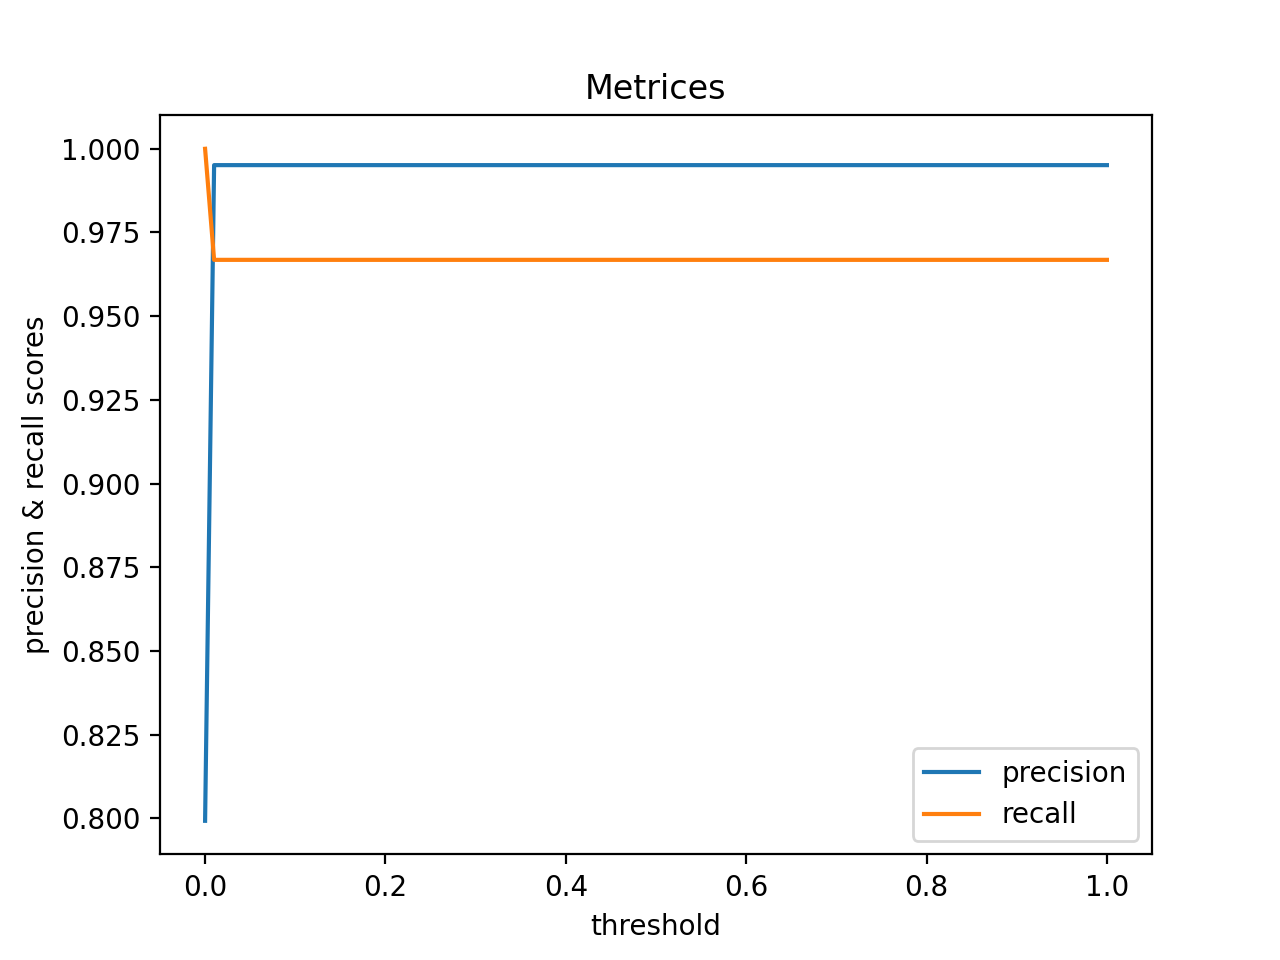

<IPython.core.display.Javascript object>

In [43]:
plt.plot(thresholds, precision_scores, label="precision")
plt.plot(thresholds, recall_scores, label="recall")
plt.xlabel("threshold")
plt.ylabel("precision & recall scores")
plt.title("Metrices")
plt.legend()

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing :

                                    F1= 2 * (P * R) / (P + R)
 

Where  is precision and  is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

At which threshold F1 is maximal?

- 0.1
- 0.4
- 0.6
- 0.7

In [49]:
from sklearn.metrics import f1_score

f1_scores = list()

for t in thresholds:
    score = f1_score(y_val, (y_pred >= t))
    f1_scores.append(score)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


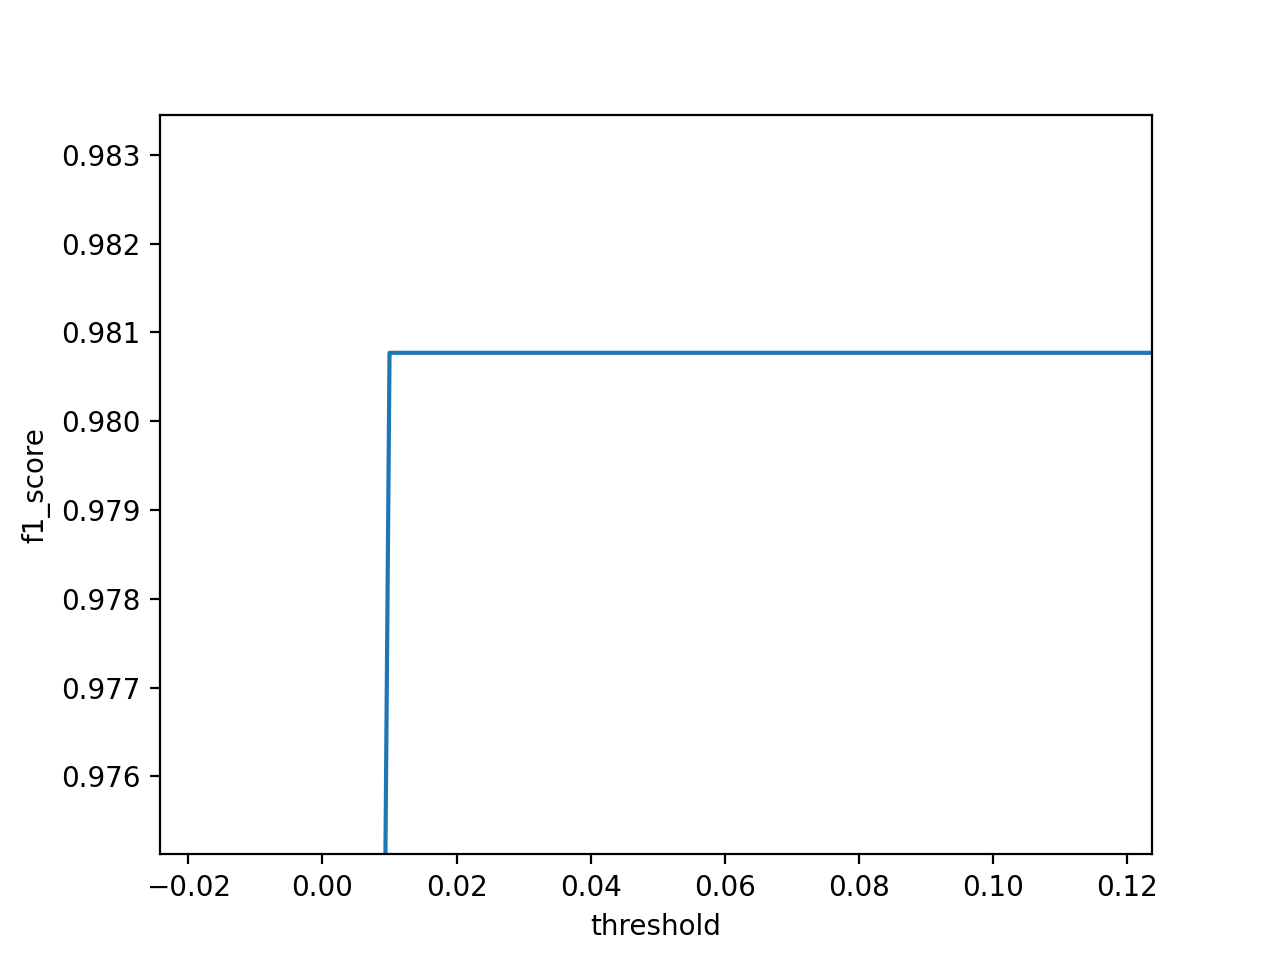

Text(0, 0.5, 'f1_score')

<IPython.core.display.Javascript object>

In [50]:
plt.plot(thresholds, f1_scores)
plt.xlabel("threshold")
plt.ylabel("f1_score")

## Question 5

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```python
KFold(n_splits=5, shuffle=True, random_state=1)
```

- Iterate over different folds of `df_full_train`
- Split the data into train and validation
- Train the model on train with these parameters:
    `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
- Use AUC to evaluate the model on validation

How large is standard deviation of the AUC scores across different folds?

- 0.003
- 0.014
- 0.09
- 0.24

In [57]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

n_splits = 5
k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = list()

for train_idx, val_idx in tqdm(k_fold.split(df_full_train)):
    
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.card.values
    y_val = df_val.card.values
    
    dv, model = train(df_train, y_train)
    y_pred, score = predict(dv, model, df_val, y_val)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))  


0it [00:00, ?it/s]

0.999 +- 0.002


<IPython.core.display.Javascript object>

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

- Iterate over the following C values: `[0.01, 0.1, 1, 10]`
- Unitialize `KFold` with the same parameters as previously
- Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [59]:
def model_tuning(df_train, y_train, C):

    train_dict = df_train.to_dict(orient="records")
    dv = DictVectorizer()
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver="liblinear", C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model


def predict(dv, model, df_val, y_val):

    val_dict = df_val.to_dict(orient="records")
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    return y_pred

<IPython.core.display.Javascript object>

In [ ]:
n_splits = 5

regulalizations = [0.01, 0.1, 1, 10]

for C in tqdm((regulalizations), len(regulalizations)):
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = list()
    
    for train_idx, val_idx in kfold.split(df_full_train):
        
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        y_train = df_train.card.values
        y_val = df_val.card.values
        
        dv, model = model_tuning(df_train, y_train, C)
        y_pred = predict(dv, model, df_val, y_val)
        
        score = roc_auc_score(y_val, y_p)